Simple self test exercise : <br>
(1) data cleaning <br>
(2) data transformation <br>
(3) chart plotting ( line chart ) <br>

In [37]:
import datetime as dt
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
# the first data is wrong , for now , we just detect and drop it        
df = pd.DataFrame({'date': ['00-01-2020','15-02-2020','02-01-2020','03-03-2020','04-04-2020','05-05-2020','06-06-2020','07-07-2020','08-08-2020','01-01-2021','09-09-2021','11-11-2021','12-12-2021'], 
'count': [10,10,1,4,5,6,12,34,11,2,1,12,22]})


In [38]:
# STEP I : Data Cleaning 
def isDateFieldValidSimple(dateStr):
    try:
        date_object = datetime.strptime(dateStr, '%d-%m-%Y')
        #print("This is the correct date string format.")
        return True
    except ValueError:
        #print("This is the incorrect date string format:",dateStr)
        return False;
    
def isDateFieldValidSimple2(row):
    try:
        date_object = datetime.strptime(row['date'], '%d-%m-%Y')
        #print("This is the correct date string format.")
        return 0
    except ValueError:
        #print("This is the incorrect date string format:",dateStr)
        return 1

dfCleaned = df[df['date'].apply(isDateFieldValidSimple) == True];
#or df[df.apply(isDateFieldValidSimple2, axis=1)==0]

print(dfCleaned)



          date  count
1   15-02-2020     10
2   02-01-2020      1
3   03-03-2020      4
4   04-04-2020      5
5   05-05-2020      6
6   06-06-2020     12
7   07-07-2020     34
8   08-08-2020     11
9   01-01-2021      2
10  09-09-2021      1
11  11-11-2021     12
12  12-12-2021     22


In [39]:
# STEP II , Data transform , assign year and month and monthString column
def convertDateStrToYear(dateStr):
    date_object = datetime.strptime(dateStr, '%d-%m-%Y')
    return date_object.year

def convertDateStrToMonthDigit(dateStr):
    date_object = datetime.strptime(dateStr, '%d-%m-%Y')
    return date_object.month


def convertDateStrToMonthStr(dateStr):
    date_object = datetime.strptime(dateStr, '%d-%m-%Y')
    m = date_object.month
    if m == 1: 
        return 'Jan'
    elif m == 2: 
        return 'Feb'
    elif m == 3: 
        return 'Mar'
    elif m == 4: 
        return 'Apr'
    elif m == 5: 
        return 'May'
    elif m == 6: 
        return 'Jun'
    elif m == 7: 
        return 'Jul'
    elif m == 8: 
        return 'Aug'
    elif m == 9: 
        return 'Sep'
    elif m == 10: 
        return 'Oct'
    elif m == 11: 
        return 'Nov'
    else: 
        return 'Dec'

dfCleaned['year'] = dfCleaned['date'].apply(convertDateStrToYear)
dfCleaned['month'] = dfCleaned['date'].apply(convertDateStrToMonthDigit)
dfCleaned['monthStr'] = dfCleaned['date'].apply(convertDateStrToMonthStr)
print('----------------------------------------------------------------------------------------')
print(dfCleaned)
print('----------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------
          date  count  year  month monthStr
1   15-02-2020     10  2020      2      Feb
2   02-01-2020      1  2020      1      Jan
3   03-03-2020      4  2020      3      Mar
4   04-04-2020      5  2020      4      Apr
5   05-05-2020      6  2020      5      May
6   06-06-2020     12  2020      6      Jun
7   07-07-2020     34  2020      7      Jul
8   08-08-2020     11  2020      8      Aug
9   01-01-2021      2  2021      1      Jan
10  09-09-2021      1  2021      9      Sep
11  11-11-2021     12  2021     11      Nov
12  12-12-2021     22  2021     12      Dec
----------------------------------------------------------------------------------------


In [40]:


#dfYear2020 =  dfCleaned[(dfCleaned["year"] == 2020) ]
#dfYear2021 =  dfCleaned[(dfCleaned["year"] == 2021) ]
#print(dfYear2020)

# Create a new column which is the sum count according to year-month 

dfCleaned['mySum'] = dfCleaned.groupby(['year','monthStr'])['count'].transform('sum')
# we just want data of 2020 for now 
dfYear2020 =  dfCleaned[(dfCleaned["year"] == 2020) ]
dfYear2021 =  dfCleaned[(dfCleaned["year"] == 2021) ]
# drop duplicate data of same month
dfYear2020.drop_duplicates(subset = ["month"])
dfYear2021.drop_duplicates(subset = ["month"])
# dfYear2020.sort_values(by=['month'], inplace=True), wait until last step

dfYear2020TrimmedRow = dfYear2020[['monthStr','mySum','month']]
dfYear2021TrimmedRow = dfYear2021[['monthStr','mySum','month']]
print(dfYear2020TrimmedRow);

  monthStr  mySum  month
1      Feb     10      2
2      Jan      1      1
3      Mar      4      3
4      Apr      5      4
5      May      6      5
6      Jun     12      6
7      Jul     34      7
8      Aug     11      8


In [41]:
# s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.NaN])
# s1.str.contains('og', regex=False)


def fillInMonthHole(df):
    idx = 1
    monthList = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    for monthStr in monthList:
        #print(df['monthStr']);
        if( df['monthStr'].str.contains(monthStr).any() ):
            pass
        else:
            df = df.append({'monthStr' : monthStr , 'mySum' : 0,'month':idx} , ignore_index=True)
        idx=idx+1
    return df 

df2020Final= fillInMonthHole(dfYear2020TrimmedRow);
df2021Final= fillInMonthHole(dfYear2021TrimmedRow);
df2020Final.sort_values(by=['month'], inplace=True)
df2021Final.sort_values(by=['month'], inplace=True)

print('2020 data is ')
print(df2020Final)
print('-----------------------------------------------')
print('2021 data is ')
print(df2021Final)

2020 data is 
   monthStr  mySum  month
1       Jan      1      1
0       Feb     10      2
2       Mar      4      3
3       Apr      5      4
4       May      6      5
5       Jun     12      6
6       Jul     34      7
7       Aug     11      8
8       Sep      0      9
9       Oct      0     10
10      Nov      0     11
11      Dec      0     12
-----------------------------------------------
2021 data is 
   monthStr  mySum  month
0       Jan      2      1
4       Feb      0      2
5       Mar      0      3
6       Apr      0      4
7       May      0      5
8       Jun      0      6
9       Jul      0      7
10      Aug      0      8
1       Sep      1      9
11      Oct      0     10
2       Nov     12     11
3       Dec     22     12


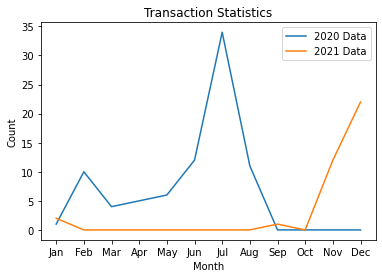

In [42]:
plt.plot(df2020Final['monthStr'],df2020Final['mySum'],label = "2020 Data")
plt.plot(df2021Final['monthStr'],df2021Final['mySum'],label = "2021 Data")
plt.title('Transaction Statistics')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

Suggested improvement : 
year data split dynamically